## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

## **Importing the Datasets**

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

| Column  | Name                              | Description                                                                                   |
|---------|-----------------------------------|-----------------------------------------------------------------------------------------------|
| CRIM    | Per capita crime rate by town     | The per capita crime rate by town                                                             |
| ZN      | Proportion of residential land    | The proportion of residential land zoned for lots over 25,000 sq.ft.                          |
| INDUS   | Non-retail business acres         | The proportion of non-retail business acres per town                                          |
| CHAS    | Charles River dummy variable      | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                         |
| NOX     | Nitric oxide concentration        | Nitric oxide concentration (parts per 10 million)                                             |
| RM      | Average number of rooms           | The average number of rooms per dwelling                                                      |
| AGE     | Proportion of older units         | The proportion of owner-occupied units built prior to 1940                                    |
| DIS     | Distance to employment centers    | The weighted distances to five Boston employment centers                                      |
| RAD     | Accessibility to highways         | The index of accessibility to radial highways                                                 |
| TAX     | Property-tax rate                 | The full-value property-tax rate per $10,000                                                  |
| PTRATIO | Pupil-teacher ratio               | The pupil-teacher ratio by town                                                               |
| B       | Proportion of blacks              | The proportion of blacks by town per 1000                                                     |
| LSTAT   | Lower status population           | The lower status of the population                                                            |
| MEDV    | Median home value (target)        | The median value of owner-occupied homes in $1000s (target)                                   |


In [3]:
df.shape

(506, 14)

In [4]:
plt.figure(figsize=(15,15))
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1500x1500 with 0 Axes>

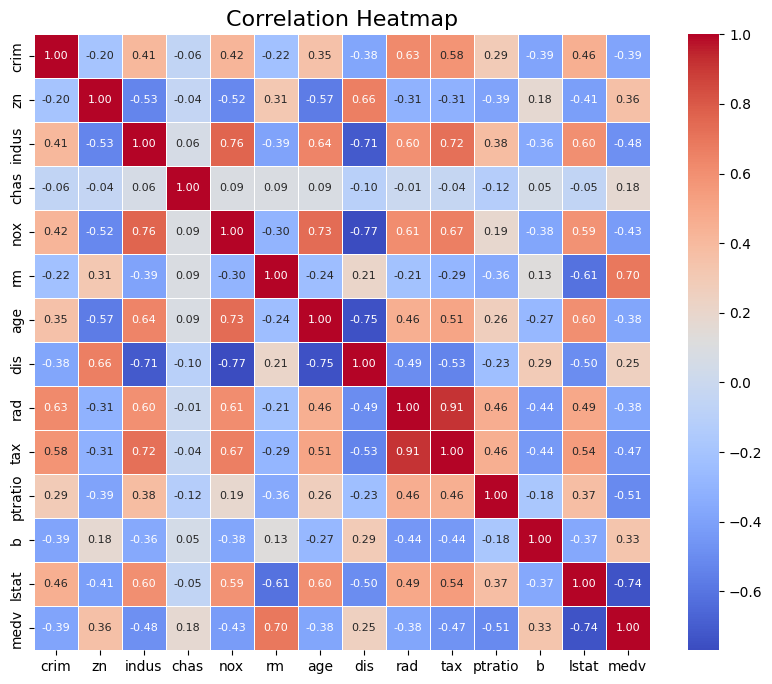

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, 
            cbar=True, square=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## **Divide data into features(Independent variables) and labels(Dependent Variables)**

In [6]:
X = df.drop(["medv"],axis=1)
y = df.filter(["medv"],axis=1)

In [7]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## **Divide data into Training and Testing sets**

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Training Linear Regression Alogorithm**

In [10]:
house_predictor = LinearRegression()

In [11]:
house_predictor.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = house_predictor.predict(X_test)
print(y_pred)

[[28.99672362]
 [36.02556534]
 [14.81694405]
 [25.03197915]
 [18.76987992]
 [23.25442929]
 [17.66253818]
 [14.34119   ]
 [23.01320703]
 [20.63245597]
 [24.90850512]
 [18.63883645]
 [-6.08842184]
 [21.75834668]
 [19.23922576]
 [26.19319733]
 [20.64773313]
 [ 5.79472718]
 [40.50033966]
 [17.61289074]
 [27.24909479]
 [30.06625441]
 [11.34179277]
 [24.16077616]
 [17.86058499]
 [15.83609765]
 [22.78148106]
 [14.57704449]
 [22.43626052]
 [19.19631835]
 [22.43383455]
 [25.21979081]
 [25.93909562]
 [17.70162434]
 [16.76911711]
 [16.95125411]
 [31.23340153]
 [20.13246729]
 [23.76579011]
 [24.6322925 ]
 [13.94204955]
 [32.25576301]
 [42.67251161]
 [17.32745046]
 [27.27618614]
 [16.99310991]
 [14.07009109]
 [25.90341861]
 [20.29485982]
 [29.95339638]
 [21.28860173]
 [34.34451856]
 [16.04739105]
 [26.22562412]
 [39.53939798]
 [22.57950697]
 [18.84531367]
 [32.72531661]
 [25.0673037 ]
 [12.88628956]
 [22.68221908]
 [30.48287757]
 [31.52626806]
 [15.90148607]
 [20.22094826]
 [16.71089812]
 [20.52384

## **Evaluating the Performance of a Trained Model**

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.189091965887874
Mean Squared Error: 24.29111947497374
Root Mean Squared Error: 4.928602182665359


## **The actual and predicted values for the test set can be plotted side by side using the following script:**

In [15]:
comparison_df = pd.DataFrame({"Actual":y_test.values.tolist(),"Predicted":y_pred.tolist()})
comparison_df

,Actual,Predicted
0,[23.6],[28.996723619824888]
1,[32.4],[36.025565335672304]
2,[13.6],[14.816944045388356]
3,[22.8],[25.031979150399692]
4,[16.1],[18.76987991524811]
...,...,...
97,[17.9],[-0.16423699568669647]
98,[9.6],[13.68486681528585]
99,[17.2],[16.1835969717134]
100,[22.5],[22.276219993533424]


In [16]:
print(house_predictor.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


## **Making Predictions on a Single Data Point**

In [17]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27


In [18]:
X_test.shape

(102, 13)

In [24]:
X_test.values

array([[9.17800e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.95500e+02, 9.04000e+00],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 3.53000e+00],
       [1.05740e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.90110e+02, 1.80700e+01],
       ...,
       [1.40507e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.50500e+01, 2.12200e+01],
       [5.18800e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
        3.95990e+02, 1.28600e+01],
       [9.51200e-02, 0.00000e+00, 1.28300e+01, ..., 1.87000e+01,
        3.83230e+02, 8.94000e+00]])

In [19]:
X_test.values[1]

array([5.6440e-02, 4.0000e+01, 6.4100e+00, 1.0000e+00, 4.4700e-01,
       6.7580e+00, 3.2900e+01, 4.0776e+00, 4.0000e+00, 2.5400e+02,
       1.7600e+01, 3.9690e+02, 3.5300e+00])

In [20]:
X_test.values[1].shape

(13,)

In [21]:
single_point = X_test.values[1].reshape(1,-1)
single_point.shape

(1, 13)

In [22]:
house_predictor.predict(X_test.values[1].reshape(1,-1))

C:\Users\vikas\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36.02556534]])

In [25]:
y_test.values[1]

array([32.4])